# Exercise 1: Linear Regression

In this exercise, we will implement linear regression and get to see it work on data.

In our example, we will build a model for the profitability of a food truck in a city. Our sample data contains the data set for our regression problem. The first column in the data set is the population of a city, the second column contains the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
# Import python modules
from six.moves import range
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# This needs to be set after importing matplotlib.pyplot, but in a different cell
plt.rcParams['figure.figsize'] = (10, 6.8)

## Examining the data

In [3]:
data = np.genfromtxt('data/ex1data1.txt', delimiter=',')

For example, the first row of our data looks like the following.

In [4]:
data[0]

array([ 6.1101, 17.592 ])

We assume that our data is scaled by 10000. Therefore, our first city has a population of 61101 and the food truck's annual profit is 175920$.

Let's visualize our data.

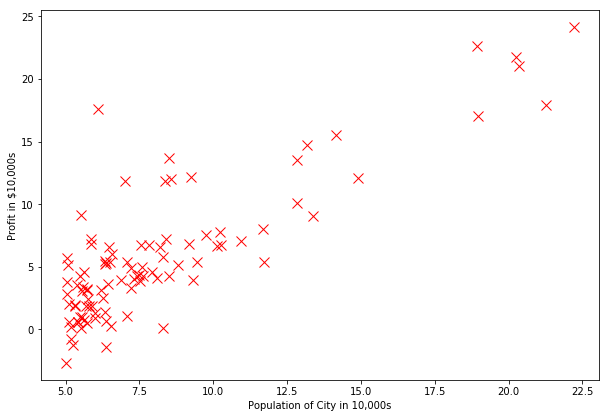

In [5]:
X = data[0:, 0]
y = data[0:, 1]
m = y.size
# plt.figure(figsize=(10,6))
plt.plot(X, y,'rx',markersize=10)
# plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s');

## Gradient descent algorithm
Let's program our gradient descent algorithm. First we initilaize some variables.

In [6]:
# Add a column of ones to X, X is then a matrix with m rows and 2 columns
X = np.hstack((np.ones((m, 1)), np.reshape(data[0:, 0], (m,1))))
y = np.reshape(data[0:, 1], (m,1))

# Initialize fitting parameters
theta = np.zeros((2, 1)); 

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

In [7]:
X.shape

(97, 2)

The objective of our linear regression (implemented using gradient descent) is to fit our parameters $ \theta = (\theta_1, \theta_2) $ in such a way, that a so called cost function $ J $ is minimized. 

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2  $$ 
with
$$ h_\theta(x) = \theta^T x $$

Remember: $ X $ is a matrix, whose $i$th row is $ (1, x_(i)) $.
Therefore, we can implement our cost function as follows: 

In [8]:
def h(theta, x):
    return np.transpose(np.dot(np.transpose(theta), np.transpose(x)))

In [9]:
def computeCost(X, y, theta):
    
    m = y.size
    
    J = 0;
    # J = 1/(2*m) * (h(theta, X)-y)' * (h(theta, X)-y);
    J = 1.0/(2*m) * np.asscalar(np.dot(np.transpose(h(theta, X) - y), h(theta, X) - y))
    return J

Let's test our cost function:

In [10]:
computeCost(X, y, theta)

32.072733877455676

In [11]:
computeCost(X, y, np.reshape([-1, 2], (2,1)))

54.24245508201238

In [12]:
computeCost(X, y, [[-1], [2]])

54.24245508201238

Now, let's implement the gradient descent algorithm.

In [13]:
def rowSum(m):
    return (np.sum(m, axis=0)[np.newaxis, :])
    
def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize some useful values
    m = y.size 
    # Record the development of our cost function for debugging purposes
    J_history = np.zeros(num_iters)

    for iter in range(num_iters):

        # theta = theta - 1/m * alpha * X' * (h(theta, X) - y ) ;
        theta = theta - 1.0/m * alpha * np.dot(np.transpose(X), h(theta, X) - y)
        #print theta

        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
    
    return (theta, J_history)

In [14]:
(theta, J_history) = gradientDescent(X, y, [[0], [0]], alpha, iterations)

In [15]:
J_history.size

1500

Hence, our fitting values are:

In [16]:
theta

array([[-3.63029144],
       [ 1.16636235]])

We can now implement our prediction function:

In [17]:
def predictProfit(theta, population):
    theta0 = theta[0,0]
    theta1 = theta[1,0]
    return theta0 + population*theta1


Let's evaluate our result: in a city with a population of 170000 people, our food truck should create a profit of:

In [18]:
predictProfit(theta, 17)

16.19786851630053

Some more examples:

In [19]:
predictProfit(theta, 3.5)

0.4519767867701767

In [20]:
predictProfit(theta, 7)

4.534245012944712

Let's visualize our linear regression result together with our data: 

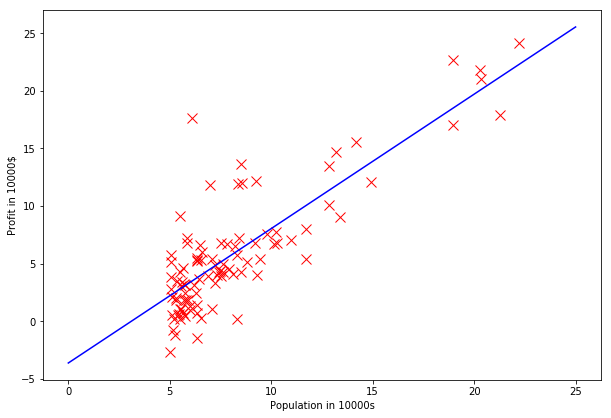

In [21]:
x1 = X[:, 1]
x2 = np.linspace(0, 25)
g = predictProfit(theta, x2)
# plt.figure(figsize=(10,6))
p1 = plt.plot(x1, y, 'rx', markersize=10)
p2 = plt.plot(x2, g, 'b-')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000$')
plt.show()

Some Observations
Let's examine how well our gradient descent algorithm was converging by plotting the history of our cost function during the execution of gradient descent.

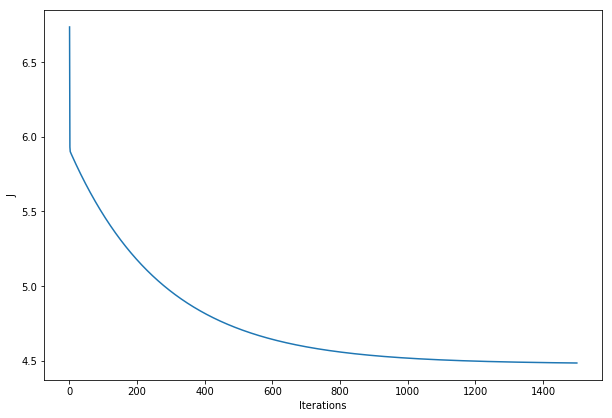

In [22]:
iteration_axis = np.linspace(1, 1500, 1500)
plt.plot(iteration_axis, J_history, '-')
plt.xlabel('Iterations')
plt.ylabel('J')
plt.show;

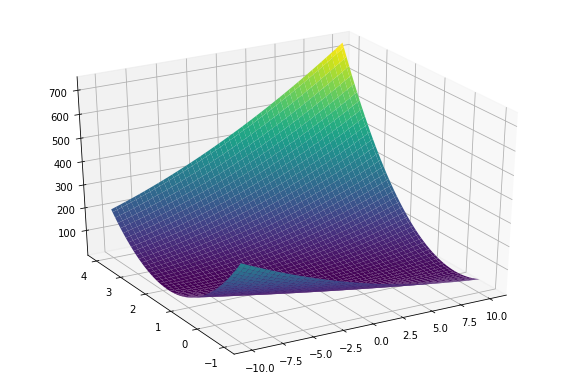

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Because of the way meshgrids work in the surface and contour plots, 
# we need to flip the axes, see: 
# https://eli.thegreenplace.net/2014/meshgrids-and-disambiguating-rows-and-columns-from-cartesian-coordinates/
# We can do so by specifiying the indexing during the creation of the meshgrid - or -
# by transposing J_vals after computing it.
(U, V) = np.meshgrid(theta0_vals, theta1_vals, indexing='ij' )

# Compute J_vals grid
J_vals = np.zeros( (theta0_vals.size, theta1_vals.size) )
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        J_vals[i, j] = computeCost(X, y, np.array([[theta0_vals[i]], [theta1_vals[j]]]))

# We created the meshgrids with correct indexing, therfore we do not need to transpose J_vals
# J_vals = np.transpose(J_vals)
        
ax.view_init(30, 240)
surf = ax.plot_surface(U, V, J_vals, cmap=plt.get_cmap('viridis'))

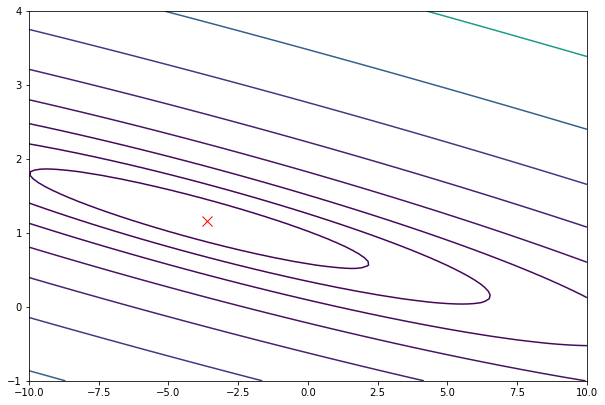

In [24]:
plt.contour(U, V, J_vals, np.logspace(-2, 3, 20))
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10);